Revision Lecture Till Now

In [1]:
import pandas as pd
import numpy as np

C:\Users\LJENG\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df = pd.read_csv('ipl-matches.csv')
df.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

In [4]:
# categorical data only
df.describe(exclude = np.number)

,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
count,899,950,950,950,950,950,950,950,950,946,946,950,19,946,950,950,950,950
unique,33,706,15,80,18,18,49,18,2,2,18,4,1,262,932,937,58,60
top,Mumbai,2014-05-10,2013,Final,Royal Challengers Bangalore,Mumbai Indians,Eden Gardens,Mumbai Indians,field,N,Mumbai Indians,Wickets,D/L,AB de Villiers,"['RD Gaikwad', 'F du Plessis', 'MM Ali', 'SK R...","['RV Uthappa', 'G Gambhir', 'MK Pandey', 'SA Y...",AK Chaudhary,S Ravi
freq,159,2,76,15,126,119,77,123,599,932,131,509,19,25,2,2,95,83


In [5]:
# check if there is null data or not
df.isna().sum()

ID                   0
City                51
Date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            4
WinningTeam          4
WonBy                0
Margin              18
method             931
Player_of_Match      4
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
dtype: int64

In [6]:
# gives number of rows and columns
df.shape

(950, 20)

In [7]:
# first check by using temporary function
df.dropna(subset = ['WinningTeam'])  # here after drop there is 946 rows and before there is 950 so 4 rows removed of WinningTeam

# now do permannent operation
df = df.dropna(subset = ['WinningTeam'])
df

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,Kolkata,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,N,Kolkata Knight Riders,Wickets,5.0,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan
946,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,N,Royal Challengers Bangalore,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper
947,335984,Delhi,2008-04-19,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,N,Delhi Daredevils,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar
948,335983,Chandigarh,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,N,Chennai Super Kings,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri


In [8]:
df.Team1.unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians', 'Kings XI Punjab',
       'Delhi Daredevils', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [9]:
# sum of unique values  note: "nunique" ,, "n" is there before unique to find number of unique entries
df.Team1.nunique()

18

THIS BELOW THING IS 10% POSSIBLE TO BE ASKED IN T1, but will be asked in hard cases

In [10]:
d = {'Delhi Daredevils' : 'Delhi Capitals', 
     'Kings XI Punjab' : 'Punjab Kings', 
     'Rising Pune Supergiants' : 'Pune Warriors', 
     'Rising Pune Supergiant' : 'Pune Warriors', 
     'Gujarat Titans' : 'Gujarat Lions'}

df = df.replace(d.keys(),d.values())

In [11]:
df.Team1.unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Lions', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians', 'Pune Warriors',
       'Deccan Chargers', 'Kochi Tuskers Kerala'], dtype=object)

In [12]:
teams = df.Team1.unique()
l = []
for team in teams:
    played = df[(df.Team1 == team) | (df.Team2 == team)].shape[0]
    win = df[df.WinningTeam == team].shape[0]
    home_play = df[df.Team1 == team].shape[0]
    home_win = df[(df.WinningTeam == team) & (df.Team1 == team)].shape[0]
    away_play = df[df.Team2 == team].shape[0]
    away_win = df[(df.Team2 == team) & (df.WinningTeam == team)].shape[0]
    l.append([team, played, win/played*100, home_win/home_play*100, away_win/away_play*100])
    
new_df = pd.DataFrame(l, columns = ['Team', 'Play', 'Win%', 'Home%', 'Away%'])
print(new_df)

                           Team  Play       Win%      Home%      Away%
0              Rajasthan Royals   190  50.526316  55.056180  46.534653
1   Royal Challengers Bangalore   223  48.878924  49.593496  48.000000
2           Sunrisers Hyderabad   152  49.342105  52.173913  46.987952
3                Delhi Capitals   222  46.396396  46.902655  45.871560
4           Chennai Super Kings   208  58.173077  58.558559  57.731959
5                 Gujarat Lions    46  54.347826  39.130435  69.565217
6          Lucknow Super Giants    15  60.000000  87.500000  28.571429
7         Kolkata Knight Riders   223  51.121076  53.333333  49.152542
8                  Punjab Kings   218  46.330275  45.454545  47.222222
9                Mumbai Indians   231  56.709957  58.035714  55.462185
10                Pune Warriors    75  36.000000  35.135135  36.842105
11              Deccan Chargers    75  38.666667  33.333333  44.444444
12         Kochi Tuskers Kerala    14  42.857143  42.857143  42.857143


In [13]:
df2022 = df[df.Season == '2022']
l = []
teams = df2022.Team1.unique()
for team in teams:
    play = df2022[(df2022.Team1 == team) | (df2022.Team2 == team)].shape[0]
    win = df2022[df2022.WinningTeam == team].shape[0]
    l.append([team, play, win, win*2])
    
new = pd.DataFrame(l, columns = ['Team', 'Player', 'Win', 'Points'])
print(new)


# probability of team win after winning toss
df[df.WinningTeam == df.TossWinner].shape[0]/df.shape[0]

                          Team  Player  Win  Points
0             Rajasthan Royals      17   10      20
1  Royal Challengers Bangalore      16    9      18
2          Sunrisers Hyderabad      14    6      12
3               Delhi Capitals      14    7      14
4          Chennai Super Kings      14    4       8
5                Gujarat Lions      16   12      24
6         Lucknow Super Giants      15    9      18
7        Kolkata Knight Riders      14    6      12
8                 Punjab Kings      14    7      14
9               Mumbai Indians      14    4       8


0.5169133192389006

In [14]:
ds = pd.read_csv('diabetes_unclean.csv')
ds.tail(7)

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
1002,188,454316,F,75.0,10.3,113.0,8.6,4.2,1.6,0.9,2.6,0.7,32.0,Y
1003,189,454316,M,58.0,4.0,55.0,7.9,4.9,2.0,1.2,1.4,1.1,35.0,Y
1004,191,454316,M,55.0,NaN,62.0,6.8,5.3,2.0,1.0,3.5,0.9,30.1,Y
1005,192,454316,M,55.0,4.8,88.0,NaN,5.7,4.0,0.9,3.3,1.8,30.0,Y
1006,193,454316,M,62.0,6.3,82.0,6.7,5.3,2.0,1.0,3.5,NaN,30.1,Y
1007,194,454316,F,57.0,4.1,70.0,9.3,5.3,3.3,1.0,1.4,1.3,29.0,Y
1008,195,4543,f,55.0,4.1,34.0,13.9,5.4,1.6,1.6,3.1,0.7,33.0,Y


In [15]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1009 non-null   int64  
 1   No_Pation  1009 non-null   int64  
 2   Gender     1009 non-null   object 
 3   AGE        1008 non-null   float64
 4   Urea       1008 non-null   float64
 5   Cr         1007 non-null   float64
 6   HbA1c      1006 non-null   float64
 7   Chol       1007 non-null   float64
 8   TG         1007 non-null   float64
 9   HDL        1008 non-null   float64
 10  LDL        1007 non-null   float64
 11  VLDL       1008 non-null   float64
 12  BMI        1009 non-null   float64
 13  CLASS      1009 non-null   object 
dtypes: float64(10), int64(2), object(2)
memory usage: 110.5+ KB


In [16]:
ds.describe(include='all')

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
count,1009.000000,1.009000e+03,1009,1008.000000,1008.000000,1007.000000,1006.000000,1007.000000,1007.000000,1008.000000,1007.000000,1008.000000,1009.000000,1009
unique,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y
freq,NaN,NaN,570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,840
mean,339.161546,2.717448e+05,NaN,53.620040,5.131094,68.973188,8.284155,4.863873,2.348769,1.204216,2.610119,1.850595,29.589911,NaN
std,239.738169,3.365681e+06,NaN,8.740975,2.931136,59.813297,2.533576,1.297326,1.397487,0.658158,1.116095,3.649859,4.946246,NaN
min,1.000000,1.230000e+02,NaN,25.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000,NaN
25%,127.000000,2.406500e+04,NaN,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000,NaN
50%,296.000000,3.439900e+04,NaN,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000,NaN
75%,548.000000,4.539000e+04,NaN,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000,NaN


In [17]:
ds.describe(exclude='number')

,Gender,CLASS
count,1009,1009
unique,3,5
top,M,Y
freq,570,840


In [18]:
ds.isna().sum()

ID           0
No_Pation    0
Gender       0
AGE          1
Urea         1
Cr           2
HbA1c        3
Chol         2
TG           2
HDL          1
LDL          2
VLDL         1
BMI          0
CLASS        0
dtype: int64

In [19]:
# swap null values of Cr and HDL with its median and mode respectively
ds['Cr'] = ds['Cr'].fillna(ds.Cr.median())
ds['HDL'] = ds['HDL'].fillna(ds.HDL.mode()[0])

In [20]:
ds.isna().sum()

ID           0
No_Pation    0
Gender       0
AGE          1
Urea         1
Cr           0
HbA1c        3
Chol         2
TG           2
HDL          0
LDL          2
VLDL         1
BMI          0
CLASS        0
dtype: int64

In [21]:
# drop all null data
ds = ds.dropna()
ds.isna().sum()

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

In [22]:
ds.duplicated().sum()

0

In [23]:
import matplotlib.pyplot as plt

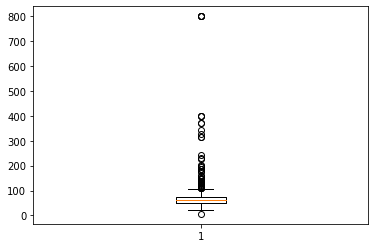

In [24]:
# display outlier from Cr column  (circle below are outliers)
plt.boxplot(ds['Cr'])
plt.show()

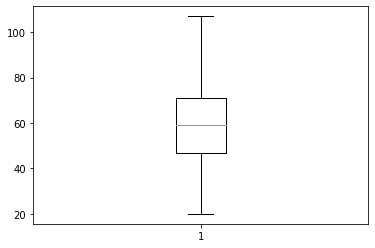

In [25]:
# remove outliers from Cr columns 
q1 = ds.Cr.quantile(0.25)
q3 = ds.Cr.quantile(0.75)
IQR = q3-q1
ul = q3 + 1.5*IQR
ll = q1 - 1.5*IQR
ds = ds[(ds.Cr <= ul) & (ds.Cr >= ll)]
plt.boxplot(ds['Cr'])
plt.show()
# compare the above and this plot ,, outliers are gone

In [26]:
# give the corelationship for the data
ds.corr(numeric_only = True)

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
ID,1.000000,0.065055,-0.079351,-0.038126,-0.068809,-0.016349,0.042811,-0.041143,0.019785,-0.055680,0.141925,0.041231
No_Pation,0.065055,1.000000,-0.092298,-0.014679,0.040058,-0.032919,-0.030997,-0.040086,-0.013785,-0.003580,0.113495,0.018341
AGE,-0.079351,-0.092298,1.000000,0.112484,0.056791,0.387649,0.039845,0.146889,-0.011228,0.016148,-0.094152,0.360918
Urea,-0.038126,-0.014679,0.112484,1.000000,0.394690,-0.020277,0.022190,0.017979,-0.012461,-0.003346,0.017597,0.034815
Cr,-0.068809,0.040058,0.056791,0.394690,1.000000,-0.133165,-0.017940,0.018376,-0.032179,0.076528,0.122105,-0.011170
HbA1c,-0.016349,-0.032919,0.387649,-0.020277,-0.133165,1.000000,0.168618,0.225927,0.033128,0.014792,0.070142,0.414576
Chol,0.042811,-0.030997,0.039845,0.022190,-0.017940,0.168618,1.000000,0.327904,0.102720,0.423780,0.072018,0.018519
TG,-0.041143,-0.040086,0.146889,0.017979,0.018376,0.225927,0.327904,1.000000,-0.088671,0.002364,0.150498,0.100751
HDL,0.019785,-0.013785,-0.011228,-0.012461,-0.032179,0.033128,0.102720,-0.088671,1.000000,-0.147034,-0.061170,0.077538
LDL,-0.055680,-0.003580,0.016148,-0.003346,0.076528,0.014792,0.423780,0.002364,-0.147034,1.000000,0.064643,-0.057985
